In [1]:
from MiQE import *

## Single-qubit phase estimation

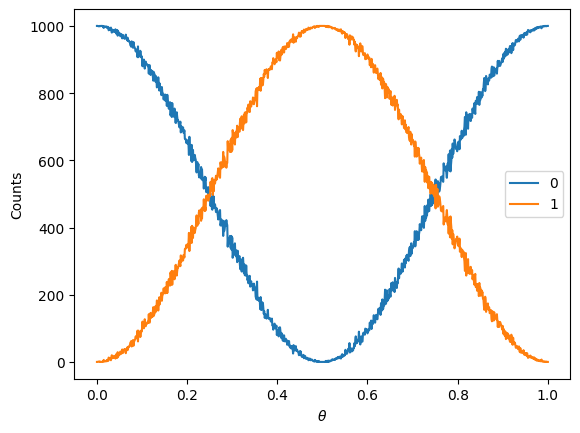

In [2]:
samples = 1000
thetas = [0 + n/samples for n in range(samples+1)]
state_list = []
count_list = []

for theta in thetas:
    qc = QuantumCircuit(2)
    qc.gate(X, 1)
    qc.gate(H, 0)
    qc.C(P(2*np.pi*theta), 0, 1)
    qc.gate(H, 0)
    
    results = []
    for _ in range(1000):
        results.append(qc.measure_all(False))
        
    states, counts = np.unique(results, return_counts=True)
    state_list.append(states.tolist())
    count_list.append(counts.tolist())

zeros = []
ones = []

for count, state in zip(count_list, state_list):
    if len(count) == 2:
        zeros.append(count[0])
        ones.append(count[1])
    else:
        if state[0] == '01':
            zeros.append(count[0])
            ones.append(0)
        elif state[0] =='11':
            zeros.append(0)
            ones.append(count[0])

plt.plot(thetas, zeros, label='0')
plt.plot(thetas, ones, label='1')
plt.xlabel(r'$\theta$')
plt.ylabel('Counts')
plt.legend()
plt.show()

## Two-qubit phase estimation

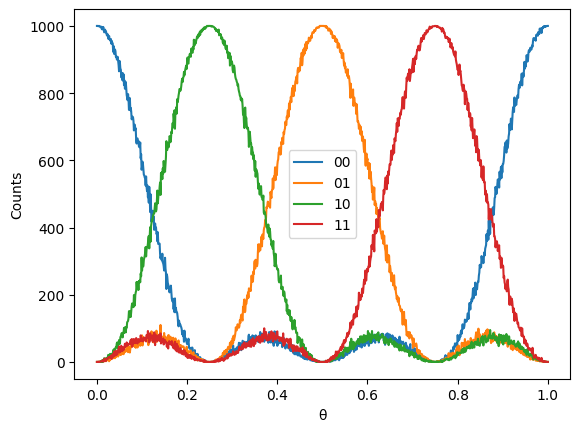

In [3]:
samples = 1000
thetas = [0 + n/samples for n in range(samples+1)]
full_state_list = []
count_list = []

for theta in thetas:
    qc = QuantumCircuit(3)

    qc.gate(X, 2)
    qc.gate(H, 0, 1)
    qc.C(P(2*np.pi*theta), 0, 2)
    qc.C(P(2*np.pi*(2*theta)), 1, 2)

    qc.C(X, 0, 1)
    qc.C(X, 1, 0)
    qc.C(X, 0, 1)
    
    qc.gate(H, 0)
    qc.C(P(-np.pi/2), 0, 1)
    qc.gate(H, 1)
    
    results = []
    for _ in range(1000):
        results.append(qc.measure_all(False))
        
    full_states, counts = np.unique(results, return_counts=True)
    full_state_list.append(full_states.tolist())
    count_list.append(counts.tolist())
    
    state_list = [[state[:-1] for state in sublist] for sublist in full_state_list]

zz, zo, oz, oo = [], [], [], []

for count, state in zip(count_list, state_list):
    zz_c = zo_c = oz_c = oo_c = 0

    for C, S in zip(count, state):
        if S == '00':
            zz_c += C
        elif S == '01':
            zo_c += C
        elif S == '10':
            oz_c += C
        elif S == '11':
            oo_c += C

    zz.append(zz_c)
    zo.append(zo_c)
    oz.append(oz_c)
    oo.append(oo_c)

plt.plot(thetas, zz, label='00')
plt.plot(thetas, zo, label='01')
plt.plot(thetas, oz, label='10')
plt.plot(thetas, oo, label='11')
plt.xlabel('θ')
plt.ylabel('Counts')
plt.legend()
plt.show()